LIBRARIES IMPORTING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

IMPORT DATA SET

In [4]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


DATA INSPECTION

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")    #replaceing blank data into 0
df["TotalCharges"]=df["TotalCharges"].astype("float")     #converting object type to float type

In [8]:
df.isnull().sum()      #check for null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.duplicated().sum()     #check for dulicate values

0

In [11]:
df['customerID'].duplicated().sum()     #check for dulicate values in primary key

0

In [12]:
df['SeniorCitizen']=df['SeniorCitizen'].replace({1:'Yes',0:'No'})   #replace senior citizen values to yes/no instead of 0/1
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


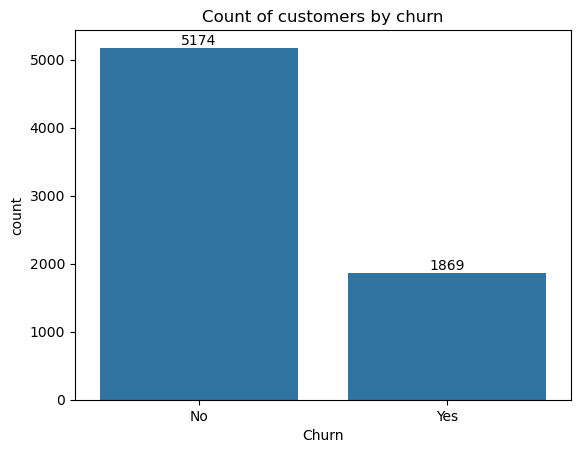

In [13]:
ax=sns.countplot(data=df,x=df['Churn'])        # show churn value in a bargraph
ax.bar_label(ax.containers[0])                 # to show total values above each bar chart
plt.title("Count of customers by churn")       # add title to plot
plt.show()

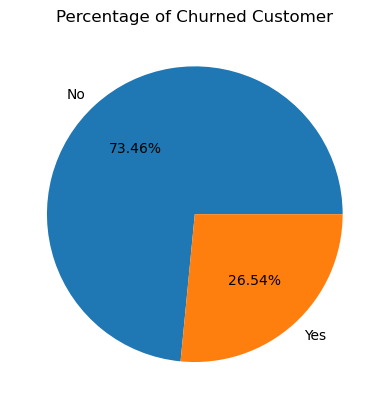

,Churn
Churn,
No,5174
Yes,1869


In [14]:
gb=df.groupby('Churn').agg({'Churn':'count'})          #to get total count in churn

plt.pie(gb['Churn'],labels=gb.index, autopct="%1.2f%%")           #show in pie chart,label, percentage
plt.title("Percentage of Churned Customer")                         #add title
plt.show()
gb

From the given pie chart 26.54% of customers had churned out

***

Explore reason behind the churn

Text(0.5, 1.0, 'Churn by Gender')

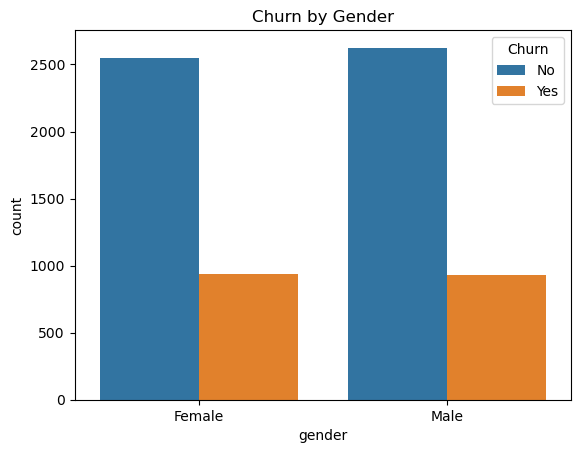

In [18]:
sns.countplot(data=df,x=df['gender'],hue="Churn")        #show bar plot on gender with respect to churn value
plt.title("Churn by Gender")

Here both male and female have similar values however males have slightly higher value as compare to female.

Text(0.5, 1.0, 'Churn by SeniorCitizen')

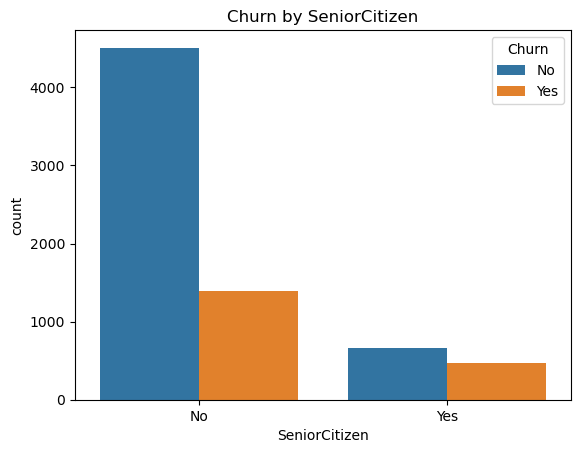

In [20]:
sns.countplot(data=df,x=df['SeniorCitizen'],hue="Churn")        #show bar plot on SeniorCitizen with respect to churn value
plt.title("Churn by SeniorCitizen")                             #add title

Comparitively a greater percentage of senior citizens had churned out

<Axes: xlabel='tenure', ylabel='Count'>

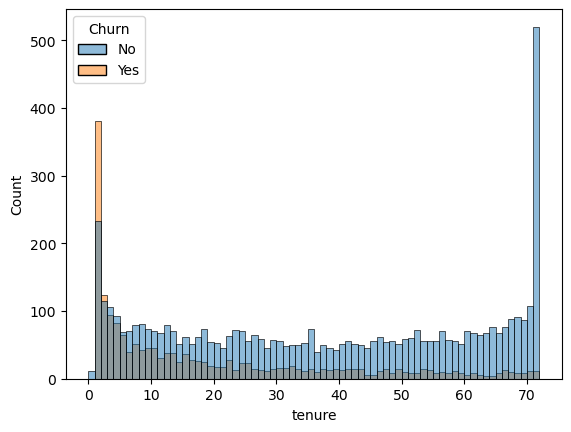

In [22]:
sns.histplot(data=df,x=df['tenure'],bins=72,hue='Churn')              #show plot on tenure

people who had used service for 1 or 2 months have churned out move and people who had stayed longer did noy churned out

Text(0.5, 1.0, 'Churn by Contract')

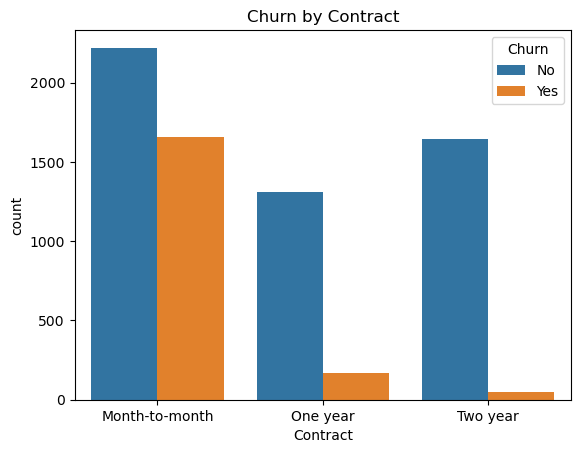

In [24]:
sns.countplot(data=df,x=df['Contract'],hue="Churn")        #show bar plot on Contract with respect to churn value
plt.title("Churn by Contract")                             #add title

The people who take month to month contract have greater chance of churning out as compare to people taking 1 year or 2 year contract.

In [26]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

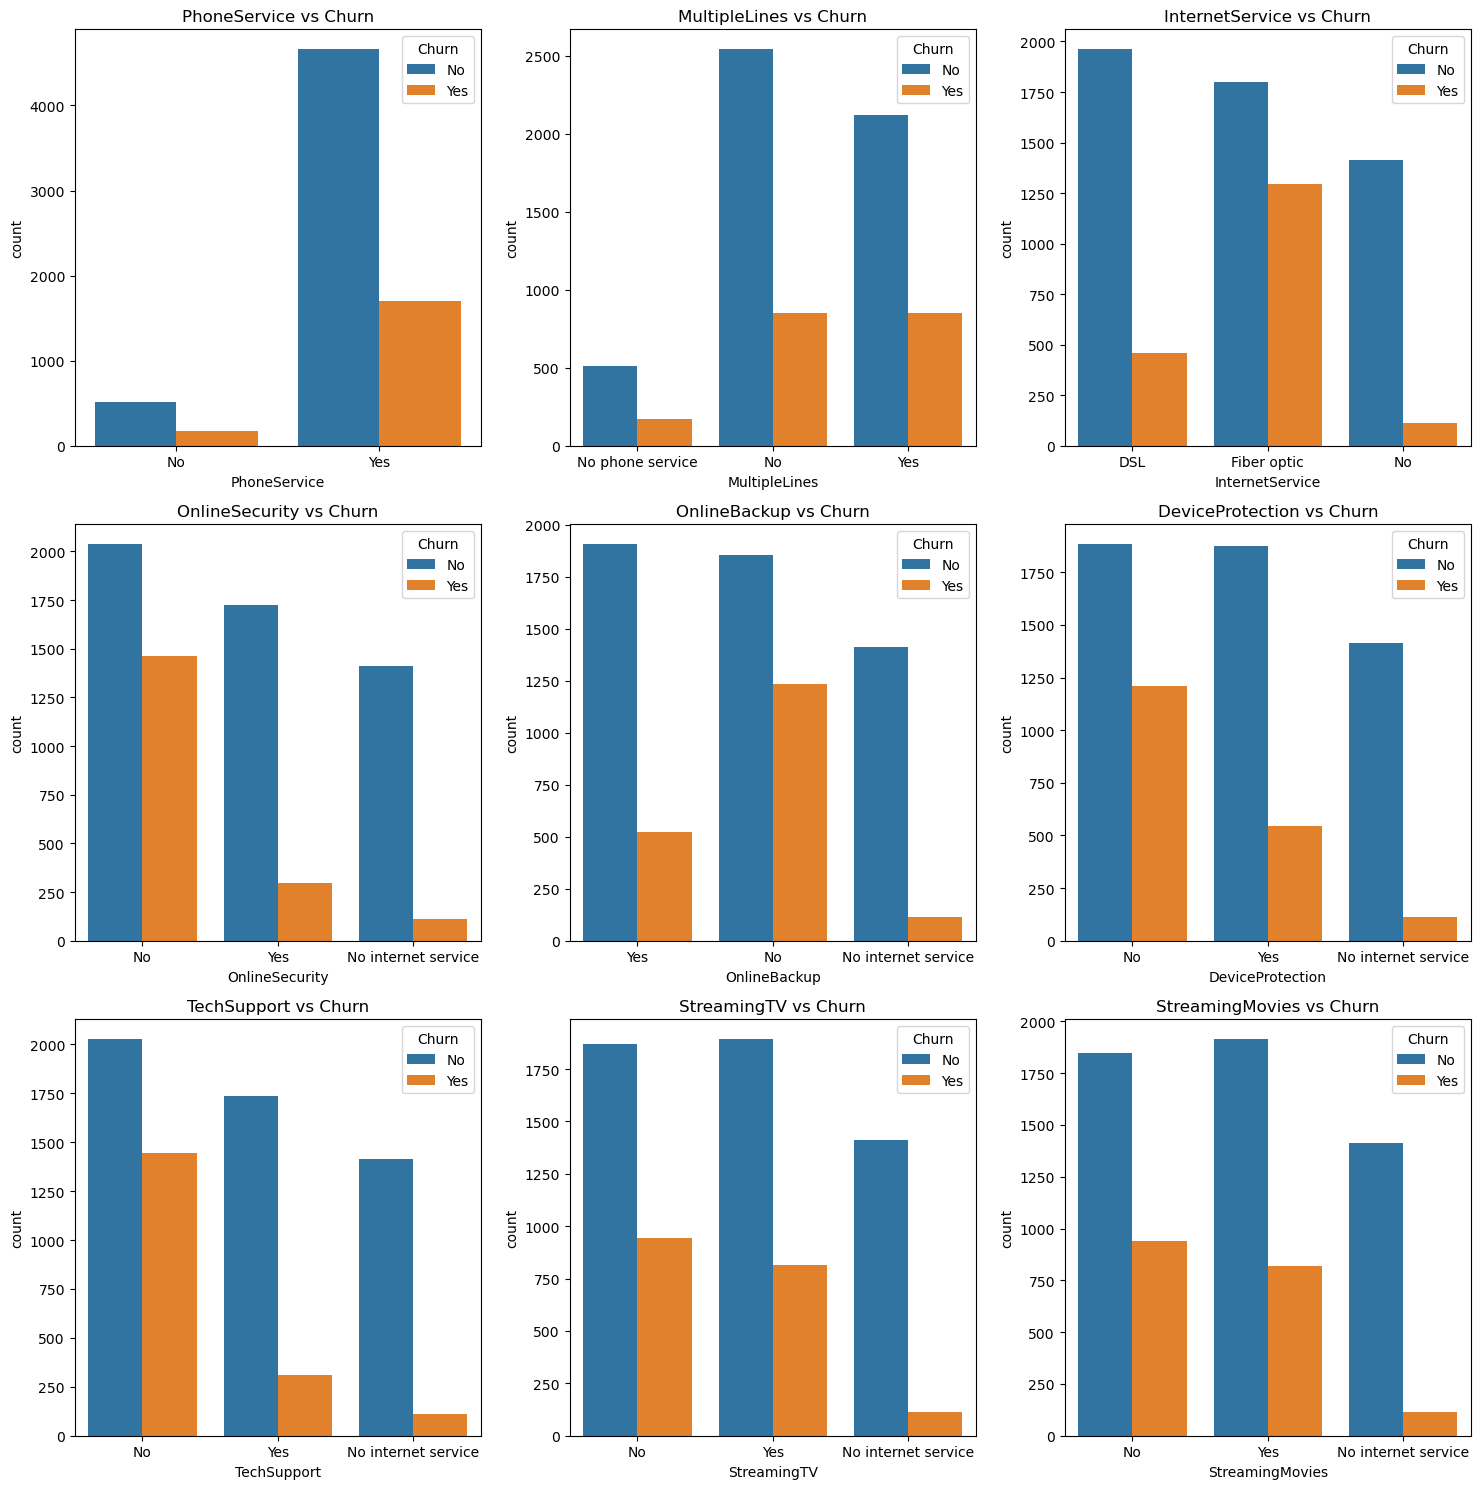

In [45]:
#list of plots with comparison to churn 

# List of columns
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust size and number of rows/columns as needed

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through the columns and plot on respective axes
for i, column in enumerate(columns):
    sns.countplot(x=column, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'{column} vs Churn')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not usel or are unavailable.

Text(0.5, 1.0, 'Churn by PaymentMethod')

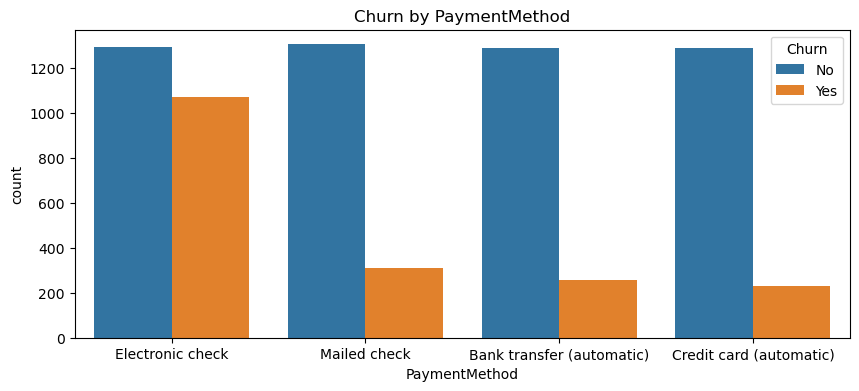

In [55]:
plt.figure(figsize=(10,4))                                 #plot size 
sns.countplot(data=df,x=df['PaymentMethod'],hue="Churn")        #show bar plot on PaymentMethod with respect to churn value
plt.title("Churn by PaymentMethod")                             #add title

people who use electronic check are more likely to churn as comare to other payment methods.

***

SUMMARY

Detailed Summary of Telecom Churn Analysis

1. Dataset Overview

The dataset comprises 21 columns, covering customer demographics, service usage, contract details, and churn status. The key features include:
 • Demographics: Gender, SeniorCitizen, Partner, Dependents.
 • Subscription Details: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport, StreamingTV, StreamingMovies.
 • Contract & Payment Details: Contract type, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges.
 • Churn: The target variable, indicating whether a customer left or stayed.

2. Churn Rate
 • 26.54% of customers churned, meaning they discontinued their telecom services.
 • This is visualized using a pie chart, which highlights the proportion of churned vs. non-churned customers.

3. Key Factors Contributing to Churn

Demographics
 • Gender: Churn rates are nearly equal between males and females, with males showing a slightly higher tendency to leave.
 • Senior Citizens: Higher churn rate compared to younger customers.

Tenure & Contract Types
 • Customers who used the service for only 1-2 months had the highest churn rates.
 • Long-term customers (tenure > 1 year) rarely churned.
 • Contract type significantly affects churn:
 • Month-to-month contracts → Highest churn rate.
 • 1-year & 2-year contracts → Customers are less likely to churn.

Service Subscription & Usage
 • Customers who had PhoneService, InternetService (DSL), and OnlineSecurity enabled were less likely to churn.
 • Higher churn rates were observed among customers who did not use OnlineBackup, TechSupport, StreamingTV.

Payment Methods
 • Customers who paid via Electronic Check were more likely to churn compared to those using other payment methods like credit cards or bank transfers.

Key Takeaways
 • Month-to-month contracts & electronic check payments are major churn indicators.
 • New users (1-2 months tenure) are more likely to leave.
 • Providing OnlineSecurity, TechSupport, and better payment options may help reduce churn.